# Exploratory and Statistical Analysis on the Data

We will perform exploratory and statistical analysis on our data, to have preliminary answers to our research questions. We will observe and investigate the influence of the following factors on the ending score: 

1) The genre(s) of the movie
2) The release date and influence of historical events
3) The key personnel of the movie (actors, directors...)
4) The movie' "success" (financial performance and popularity)
5) The region of production and the language of the movie
6) The budget and production scale of the movie
7) The movie's duration
8) The fact that the movie is part of collection of movies (e.g. part of a trilogy)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import ast
import scipy.stats as stats


from scipy.stats import mannwhitneyu
from scipy.stats import kstest
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

from PIL import Image


In [2]:
# path
DATA_FOLDER = 'src/data/'
MOVIE_DATASET = DATA_FOLDER + 'movies_dataset_final.tsv'

# Dataset loading
movies = pd.read_csv(MOVIE_DATASET, sep='\t')

## 1. Movie genres

How does the genre of a movie influence the type of ending it has (happy, tragic)? Certain genres may have a higher likelihood of happy or tragic endings.

In [3]:
from src.scripts.rq_1 import load_data, clean_and_filter_genres, plot_genre_counts, plot_average_ending_score, interactive_distribution_genre_plot, analyze_movie_genres, dunn_test_and_plot, dunn_test_with_balanced_data

In [4]:
movies_genres, genre_counts = clean_and_filter_genres(movies, threshold=500)

Number of genres in the dataset: 346
Number of genres we keep for our analysis: 36 (Genres with more than 500 movies)


What kind of genres do we have in this dataset ? And how many movies for each genre ?

In [ ]:
plot_genre_counts(movies_genres)
img = Image.open('assets/img/genre2.png')

We observe that some genres contain much more movies than others. For example, more than 9000 movies of our dataset are "drama" movies whereas there are only 508 movies that are "coming of age". We have to keep that in mind later, when statistically analyzing the difference between the movie genres, since thay don't all have the same size.

We can have a look at the mean ending score for each movie genre.

In [ ]:
plot_average_ending_score(movies_genres)
img = Image.open('assets/img/genre.png')

What we observe is not surprising as the genres with the lowest mean ending scores are horror movies, psychological thrillers and crime thrillers. On the other hand, the genres with the highest mean scores are romantic comedies, musicals and children's/family movies. We can see that there seems to eb a difference in the ending score depending on the genre of the movie, but let's dig deeper! Let's have a look at the movie score distribution for each genre.

In [ ]:
interactive_distribution_genre_plot(movies_genres)
img = Image.open('assets/img/genre_distribution.png')

Dropdown(description='Genre:', options=('thriller', 'science fiction', 'horror', 'adventure', 'action', 'psych…

Output()

We can see that the distributions of scores do vary across the movie genres. But let's perform a statistical analysis just to be sure.

Since the assumptions of normality are violated (performed a Shapiro-Wilk test to check for normality), we cannot perform an ANOVA test, but instead we performed a Kruskal-Wallsi Test that confirms that there is a statistical significance in the distribution of the ending score between some genres. We perform a pair-wise Dunn's Test to see which genre have a significance difference (p value < 0.05). 

In order to perform a robust Dunn's Test we bootstrapped the data before hand to ensure that all gernes had similar sizes because our dataset was quite imbalances (the genres 'drama' and 'comedy' contained way more movies than other genres).

We can now visualize the results of Dunn's test or our balanced dataset (used a boot strapping thrshold of 700 movies) to see how the genres have statisctical differences in ending score. On the following heatmap we use a logarithmic scale to make the smallest p values more prominent. The lighter values represent a significant statistical difference (smaller p value). We can see that the genres that differ most from one another in terms of ending score are for example: romantic comedies vs horror movies or romantic comedies vs crime thrillers.

In [8]:
dunn_test_with_balanced_data(movies_genres, 1000)



Checking Assumptions

Performing Shapiro-Wilk test for normality.

Performing Levene's test for homogeneity of variances.

Assumptions are violated, performed Kruskal-Wallis Test (non-parametric alternative to ANOVA).


### 2. Release date and Influence of historical events

Further analysis will focus on investigating correlations between movies and historical events through various approaches:
1. **Temporal analysis**: Investigate if there is an overall correlation between the happy endings of movies and global conflicts or wars. Account for production delays by shifting the timelines of movies and events by x years to identify where the strongest correlation lies. Possibly 'x' could be determined using a mean production time or finding precise data for the production of eahc movie. This will require to perform temporal analysis by clustering events and movies into defined time periods (e.g., decades).
2. **Geographic Insights**: Explore regional and country-level correlations to identify whether specific regions or nations are disproportionately reflected in movies.
3. **Thematic Connections**: Analyze if movies with themes similar to historical events (e.g., war, diplomacy) reflect the outcomes or nature of those events in their narratives and endings.
4. **Impact of Crisis Severity**: Investigate whether movies produced during or after high-fatality crises tend to have darker or more reflective endings.

### 3. Key personnel (directors)

In [9]:
from src.scripts.rq_3 import get_analysis, get_director_avg_score, get_director_score_variance, get_director_avg_score_vs_avg_revenue, get_director_avg_score_vs_avg_vote_average, t_test_avg_score_on_revenue, t_test_avg_score_on_vote_average, t_test_score_variance_on_revenue, t_test_score_variance_on_vote_average

save_path = "./assets/img/rq3/"

# Get the analysis
director_avg_score, director_score_variance, director_avg_revenue, director_avg_vote_average = get_analysis(MOVIE_DATASET)

ModuleNotFoundError: No module named 'src.scripts.rq_3'

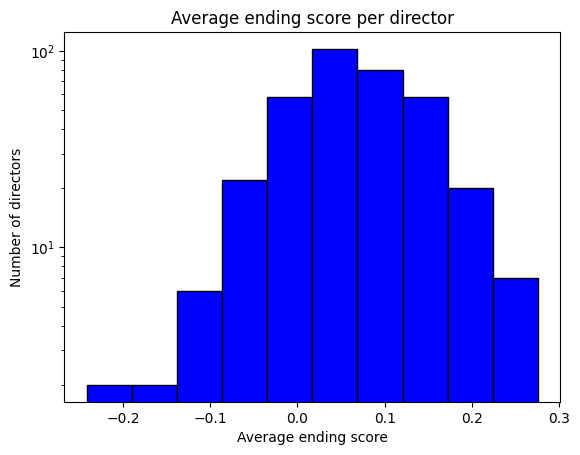

In [ ]:
# Get the average score of the directors
get_director_avg_score(director_avg_score, save_path=save_path)


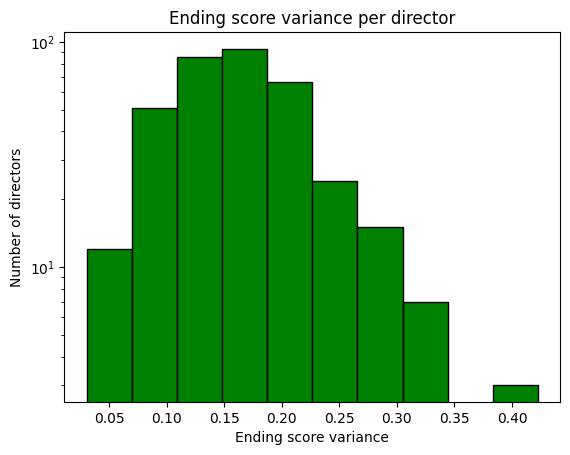

In [ ]:
# Get the variance of the scores of the directors
get_director_score_variance(director_score_variance, save_path=save_path)

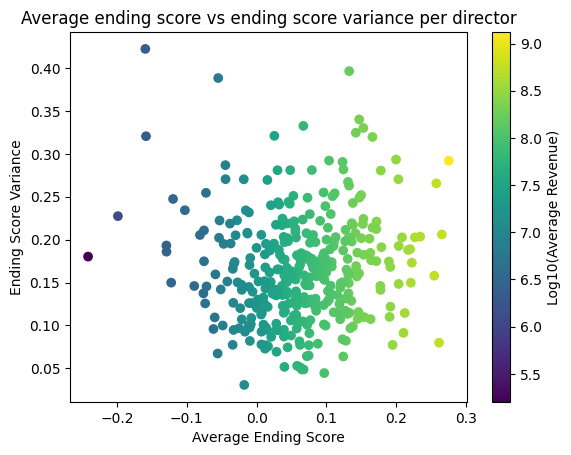

In [ ]:
# Get the average score of the directors vs the average revenue
get_director_avg_score_vs_avg_revenue(director_avg_score, director_score_variance, director_avg_revenue, save_path=save_path)

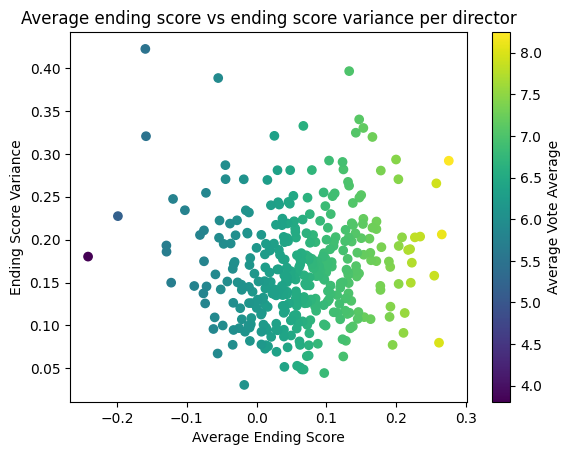

In [ ]:
# Get the average score of the directors vs the average vote average
get_director_avg_score_vs_avg_vote_average(director_avg_score, director_score_variance, director_avg_vote_average, save_path=save_path)

In [ ]:
# use t test to check if the average score is significantly different between directors with high and low revenue
t_test_avg_score_on_revenue(director_avg_score, director_avg_revenue)

The average score is significantly different between directors with high and low revenue


True

In [ ]:
# use t test to check if the average score is significantly different between directors with high and low vote average
t_test_avg_score_on_vote_average(director_avg_score, director_avg_vote_average)

The average score is significantly different between directors with high and low vote average


True

In [ ]:
# use t test to check if the score variance is significantly different between directors with high and low revenue
t_test_score_variance_on_revenue(director_score_variance, director_avg_revenue)

The score variance is not significantly different between directors with high and low revenue


False

In [ ]:
# use t test to check if the score variance is significantly different between directors with high and low vote average
t_test_score_variance_on_vote_average(director_score_variance, director_avg_vote_average)

The score variance is not significantly different between directors with high and low vote average


False

### 4. Movie's 'success'

Is there a correlation between a movie’s ending and its success (ratings, box office revenue, etc.)?

We will explore whether happy or tragic endings have any impact on a movie's popularity or financial performance.

To do so, we used the the tmdb dataset to augment our dataset and to provide the information of the box office revenue (more complete because in our own dataset we only had this information for ~10% of the movies) and the vote average, which is an average of the audience's rating on the movie. 

In [ ]:
from src.scripts.rq_4 import get_analysis, get_score_vs_revenue, get_score_vs_vote_average, test_revenue, test_vote_average

# Get the analysis
movies_filtered = get_analysis(MOVIE_DATASET)

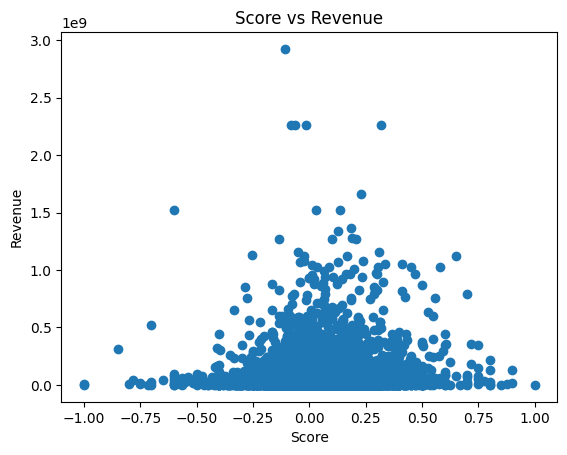

In [ ]:
# Get the score vs revenue
get_score_vs_revenue(movies_filtered)

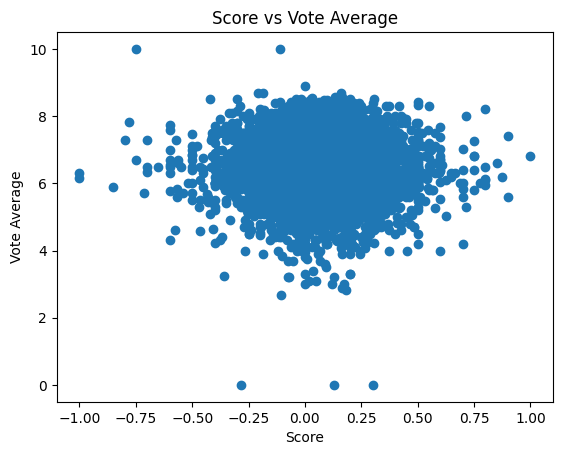

In [ ]:
# Get the score vs vote average
get_score_vs_vote_average(movies_filtered)

In [ ]:
# use t test to test if the average revenue is different for movies with low score and movies with high score
test_revenue(movies_filtered)

t-statistic: -1.4923897739237577
p-value: 0.13587987389734735
The difference is not statistically significant


False

In [ ]:
# use t test to test if the average vote average is different for movies with low score and movies with high score
test_vote_average(movies_filtered)

t-statistic: 0.12254474638500776
p-value: 0.9024896937738693
The difference is not statistically significant


False

In conclusion, we cannot see a clear correlation between the ending score and the box office revenue or the vote average. We can see that the vote average is slightly higher for movies with happy endings, but the difference is not significant.

## 5. Region/Country of production of the movie

### 1. Average Movie Score by Country
A horizontal bar chart showing the **average movie score** for countries with at least **10 films**.

### 2. Evolution of Average Movie Scores Over Time
A line plot displaying the **average movie score** per year, filtered to include only years with at least **50 films**.


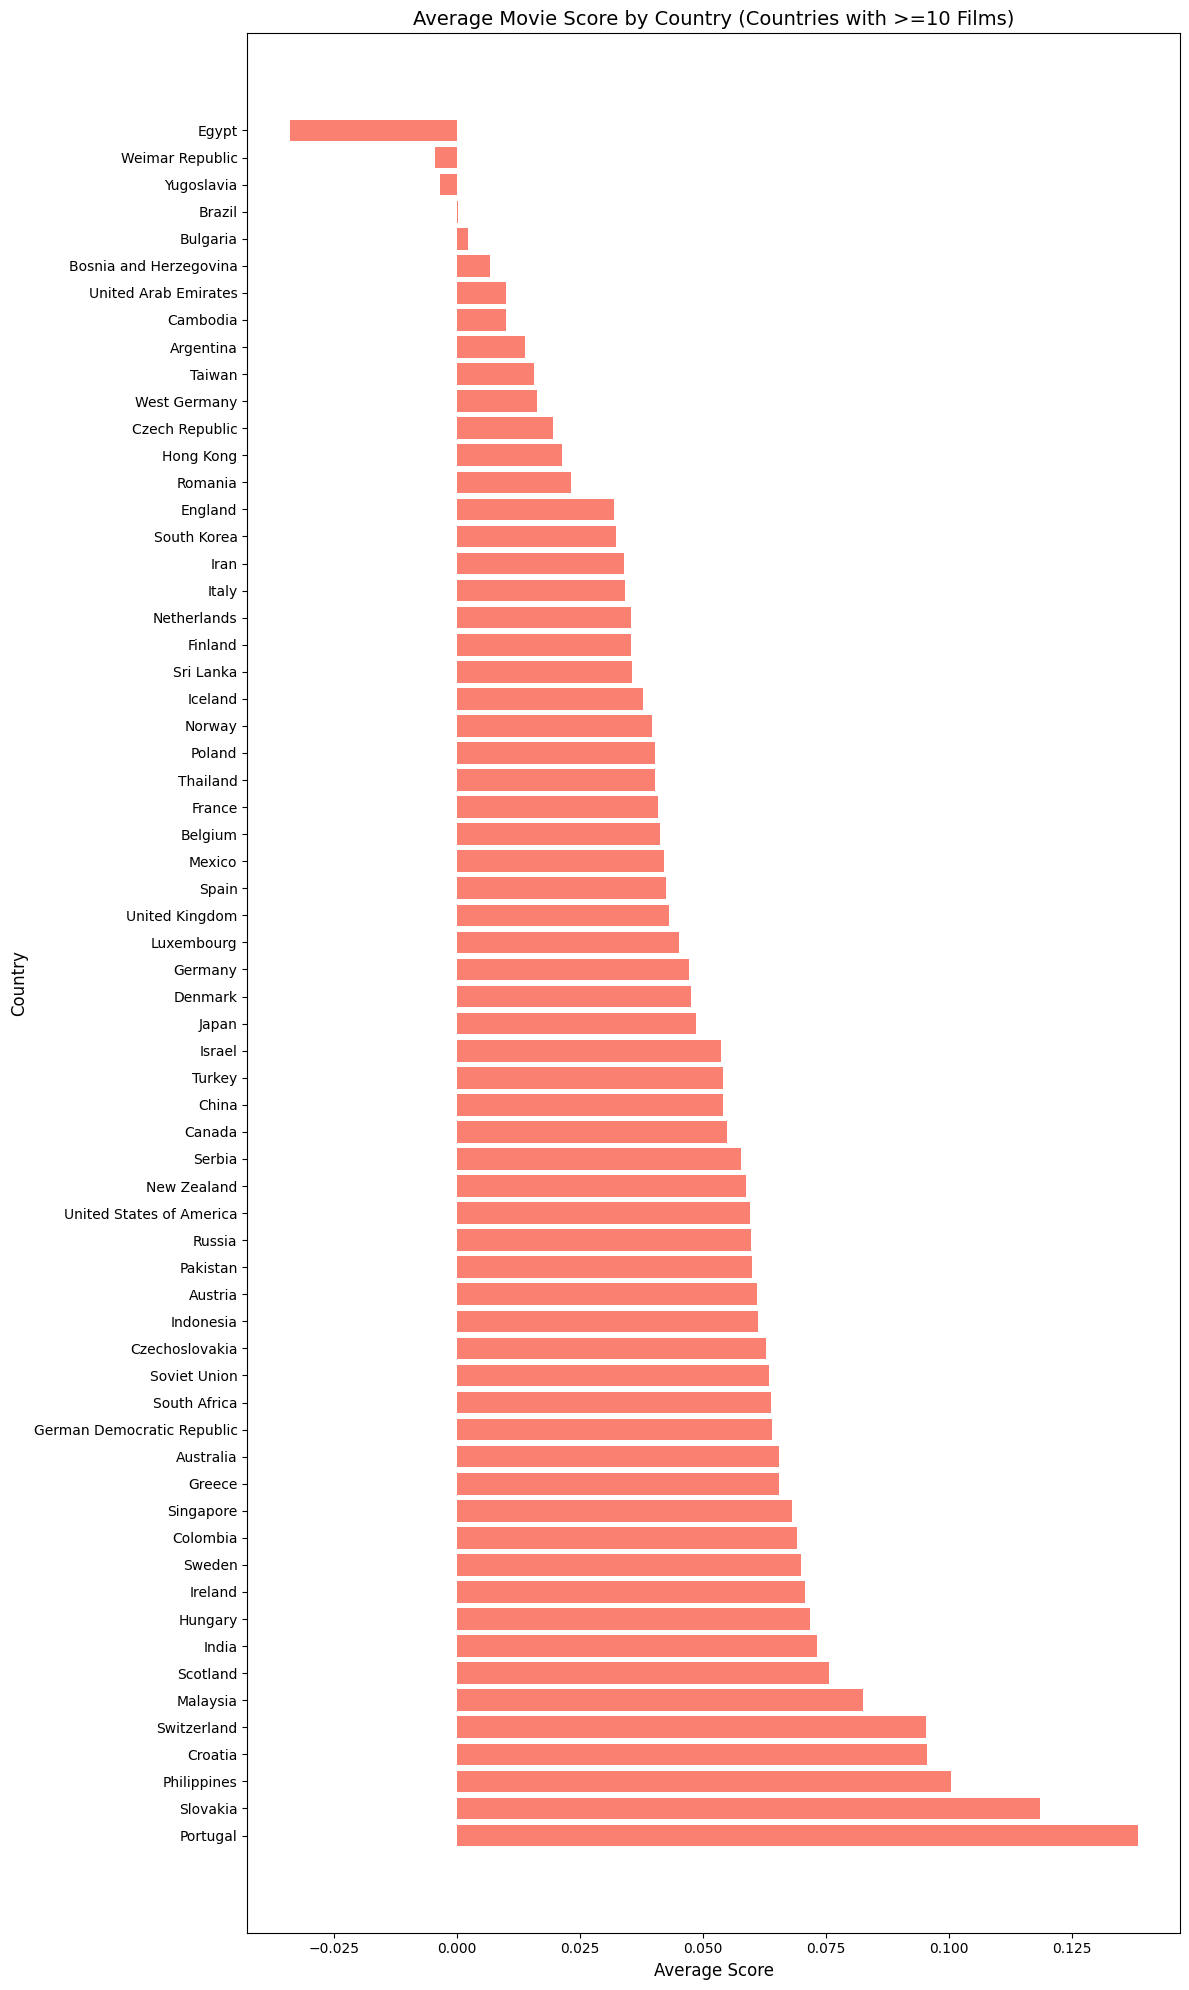

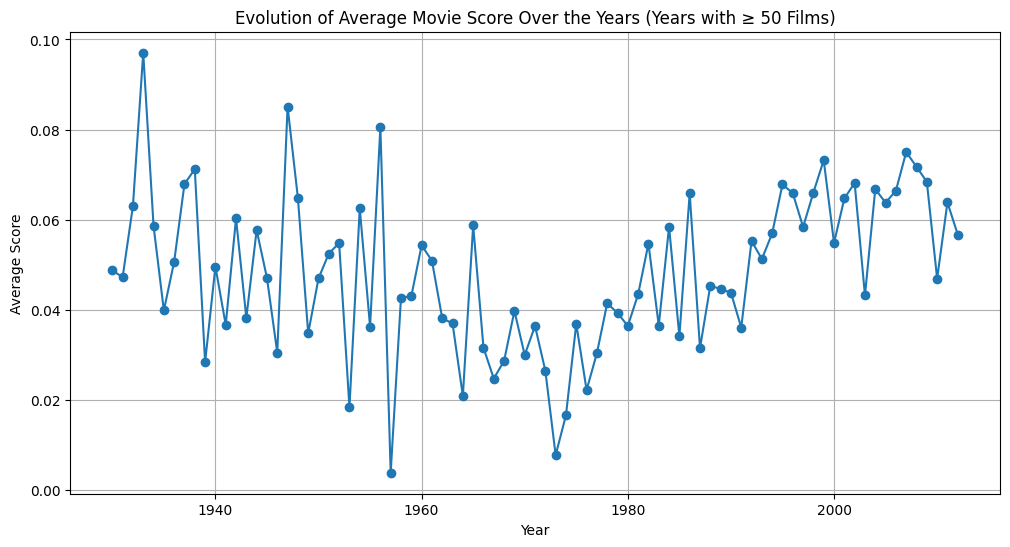

In [ ]:
file_path = 'src/data/movies_dataset_final.tsv'
movies_df = pd.read_csv(file_path, sep='\t')

# Split the 'Movie countries' column into individual countries
movies_df = movies_df.assign(Country=movies_df['Movie countries'].str.split(", ")).explode('Country')

# Calculate average score and film count per country
country_stats = movies_df.groupby('Country').agg(
    Average_Score=('Score', 'mean'),
    Film_Count=('Score', 'size')
).sort_values(by='Average_Score', ascending=False)

# Filter countries with at least 10 films
country_stats_10_plus = country_stats[country_stats['Film_Count'] >= 10]

# Plot for countries with at least 10 films
plt.figure(figsize=(12, 20))
plt.barh(country_stats_10_plus.index, country_stats_10_plus['Average_Score'], color='salmon')
plt.ylabel('Country', fontsize=12)
plt.xlabel('Average Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Average Movie Score by Country (Countries with >=10 Films)', fontsize=14)
plt.tight_layout()
plt.show()

score_and_count_by_year = movies_df.groupby('Movie release date').agg(
    Average_Score=('Score', 'mean'),
    Film_Count=('Score', 'size')
)

filtered_data = score_and_count_by_year[score_and_count_by_year['Film_Count'] >= 50]

plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data['Average_Score'], marker='o', linestyle='-')
plt.title('Evolution of Average Movie Score Over the Years (Years with ≥ 50 Films)')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()


In [ ]:
# Import the functions from the script
from src.scripts.rq_5 import load_and_preprocess, plot_average_scores_by_country, plot_scores_distribution_by_country

# Plot average scores by country
plot_average_scores_by_country(movies_df, min_films=120)

# Plot scores distribution by country
plot_scores_distribution_by_country(movies_df, min_films=120)

# plot the country.png file
img = Image.open('assets/img/country.png')
img = Image.open('assets/img/country2.png')


NameError: name 'movies_df' is not defined

## 6. Budget and Production scale

### Do budget and production scale affect the type of ending chosen? Exploring whether high-budget films tend to favor certain endings (e.g., happy endings for wider audience appeal) could reveal if financial considerations impact storytelling choices.


Remove movies with missing values for budget

In [ ]:
movies = pd.read_csv(MOVIE_DATASET, sep='\t')
# Count rows where 'budget' is NaN or 0
missing_or_zero_count = movies[(movies['Budget'].isnull()) | (movies['Budget'] == 0)].shape[0]
# Calculate the percentage of these rows
percentage_missing_or_zero = (missing_or_zero_count / len(movies)) * 100
# Remove rows where 'budget' is NaN or 0
movies = movies[(movies['Budget'].notnull()) & (movies['Budget'] > 0)]
# Verify removal
remaining_rows = len(movies)
missing_productions = movies['Production'].isna().sum()


In [ ]:
# Function to extract production names
def extract_production_names(production_list):
    # Ensure the input is a list of dictionaries
    if isinstance(production_list, str):
        # If the column contains a string representation of a list (like JSON), convert it to a list
        try:
            production_list = ast.literal_eval(production_list)
        except (ValueError, SyntaxError):
            return []  # Return empty list if there's a parsing error

    # If it's a valid list of dictionaries, extract the 'name'
    if isinstance(production_list, list):
        return [item['name'] for item in production_list if isinstance(item, dict) and 'name' in item]
    return []

# Apply the function to the 'productions' column to extract production names
movies['production_names'] = movies['Production'].apply(extract_production_names)

# Count the number of missing values in the 'production_names' column
missing_production_names = movies['production_names'].isna().sum()


In [ ]:
# Extract the first production name for each film
movies['first_production_name'] = movies['production_names'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)


### Statistics

In [ ]:
# Calculate the correlation between budget and score
correlation = movies['Budget'].corr(movies['Score'])
print(f"Correlation between budget and score: {correlation:.2f}")

Correlation between budget and score: 0.04


We use an ANOVA (Analysis of Variance) test to determine if the mean scores across the groups of films, defined by their first production, differ significantly. This test is appropriate because we are comparing multiple groups (each corresponding to a different production) on a continuous variable (the film score). ANOVA helps to assess whether the variation in scores is due to differences between the production groups or if it can be attributed to random chance.

In [ ]:

# Group by the first production name and calculate the mean score for each production
production_score = movies.groupby('first_production_name')['Score'].mean()

# Perform ANOVA to test if there are significant differences in the scores between production groups
anova_result = stats.f_oneway(*(movies[movies['first_production_name'] == prod]['Score'] for prod in production_score.index))

# Print the result in a cleaner format
if anova_result.pvalue < 0.05:
    print("ANOVA result: There are significant differences in scores between production groups.")
else:
    print("ANOVA result: There are no significant differences in scores between production groups.")

print(f"ANOVA p-value: {anova_result.pvalue:.4f}")


ANOVA result: There are significant differences in scores between production groups.
ANOVA p-value: 0.0076


## 7. Movie's duration

### How do movie endings vary by film length ? This question would explore whether movies of different lengths (e.g., short vs. feature-length) tend to have different types of endings.


Threshold: 100, p-value: 0.0003 - Significant
Mean Score for Short Movies: 0.05
Mean Score for Feature-length Movies: 0.06
Difference in means: 0.01

Threshold: 130, p-value: 0.0088 - Significant
Mean Score for Short Movies: 0.05
Mean Score for Feature-length Movies: 0.07
Short films mean increased by 0.00 compared to previous threshold
Feature-length films mean increased by 0.01 compared to previous threshold
Difference in means: 0.01

Threshold: 140, p-value: 0.0432 - Significant
Mean Score for Short Movies: 0.06
Mean Score for Feature-length Movies: 0.07
Short films mean increased by 0.00 compared to previous threshold
Feature-length films mean increased by 0.00 compared to previous threshold
Difference in means: 0.01

Threshold: 210, p-value: 0.0123 - Significant
Mean Score for Short Movies: 0.07
Mean Score for Feature-length Movies: 0.02
Short films mean increased by 0.01 compared to previous threshold
Feature-length films mean decreased by 0.05 compared to previous threshold
Diff

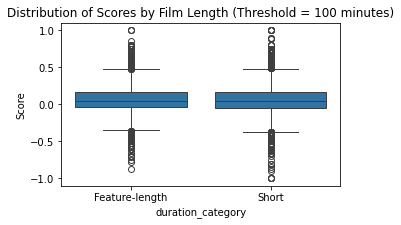

Descriptive Statistics by Duration Category:
                   mean  median  std  count
duration_category                          
Feature-length     0.06    0.05 0.18   5680
Short              0.06    0.05 0.18   5680

Normality Test (D'Agostino and Pearson):
Short Movies: Stat=249.4913, p-value=0.0000
Feature-length Movies: Stat=234.5275, p-value=0.0000
Short movies distribution does not follow a normal distribution.
Feature-length movies distribution does not follow a normal distribution.

Levene's Test for Equality of Variances: Statistic=4.0108, p-value=0.0452
Variances between short and feature-length movies are not equal.

Mann-Whitney U Test Results:
Statistic: 15833950.0000, p-value: 0.0889
The difference between short and feature-length movies is not statistically significant.


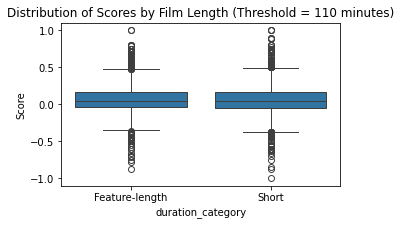

Descriptive Statistics by Duration Category:
                   mean  median  std  count
duration_category                          
Feature-length     0.07    0.06 0.18   2500
Short              0.05    0.05 0.18   2500

Normality Test (D'Agostino and Pearson):
Short Movies: Stat=115.7620, p-value=0.0000
Feature-length Movies: Stat=106.6960, p-value=0.0000
Short movies distribution does not follow a normal distribution.
Feature-length movies distribution does not follow a normal distribution.

Levene's Test for Equality of Variances: Statistic=0.2399, p-value=0.6243
Variances between short and feature-length movies are equal.

Mann-Whitney U Test Results:
Statistic: 2991320.5000, p-value: 0.0088
The difference between short and feature-length movies is statistically significant.
Mean Score for Short Movies: 0.05
Mean Score for Feature-length Movies: 0.07
The mean score increases for feature-length movies compared to short movies.


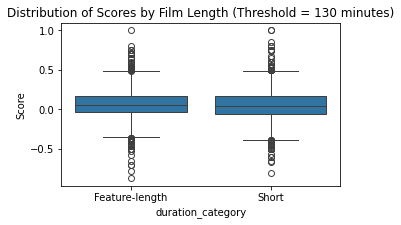

Descriptive Statistics by Duration Category:
                   mean  median  std  count
duration_category                          
Feature-length     0.07    0.06 0.18   1808
Short              0.06    0.05 0.18   1808

Normality Test (D'Agostino and Pearson):
Short Movies: Stat=97.7072, p-value=0.0000
Feature-length Movies: Stat=69.5218, p-value=0.0000
Short movies distribution does not follow a normal distribution.
Feature-length movies distribution does not follow a normal distribution.

Levene's Test for Equality of Variances: Statistic=0.6749, p-value=0.4114
Variances between short and feature-length movies are equal.

Mann-Whitney U Test Results:
Statistic: 1570975.0000, p-value: 0.0432
The difference between short and feature-length movies is statistically significant.
Mean Score for Short Movies: 0.06
Mean Score for Feature-length Movies: 0.07
The mean score increases for feature-length movies compared to short movies.


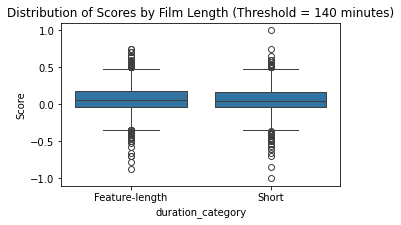

Descriptive Statistics by Duration Category:
                   mean  median  std  count
duration_category                          
Feature-length     0.02    0.01 0.15    104
Short              0.07    0.06 0.18    104

Normality Test (D'Agostino and Pearson):
Short Movies: Stat=7.1252, p-value=0.0284
Feature-length Movies: Stat=0.3064, p-value=0.8580
Short movies distribution does not follow a normal distribution.
Feature-length movies distribution follows a normal distribution.

Levene's Test for Equality of Variances: Statistic=1.2651, p-value=0.2620
Variances between short and feature-length movies are equal.

Mann-Whitney U Test Results:
Statistic: 6495.0000, p-value: 0.0123
The difference between short and feature-length movies is statistically significant.
Mean Score for Short Movies: 0.07
Mean Score for Feature-length Movies: 0.02
The mean score does not increase for feature-length movies compared to short movies.


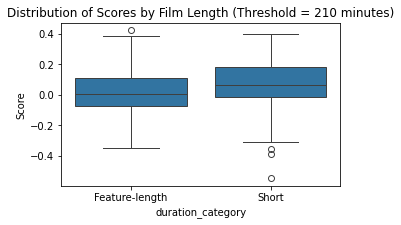

Descriptive Statistics by Duration Category:
                   mean  median  std  count
duration_category                          
Feature-length     0.01    0.00 0.14     81
Short              0.09    0.08 0.17     81

Normality Test (D'Agostino and Pearson):
Short Movies: Stat=8.7950, p-value=0.0123
Feature-length Movies: Stat=0.9144, p-value=0.6331
Short movies distribution does not follow a normal distribution.
Feature-length movies distribution follows a normal distribution.

Levene's Test for Equality of Variances: Statistic=2.4789, p-value=0.1174
Variances between short and feature-length movies are equal.

Mann-Whitney U Test Results:
Statistic: 4207.5000, p-value: 0.0019
The difference between short and feature-length movies is statistically significant.
Mean Score for Short Movies: 0.09
Mean Score for Feature-length Movies: 0.01
The mean score does not increase for feature-length movies compared to short movies.


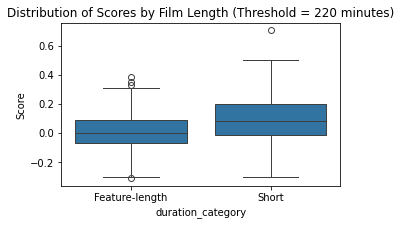

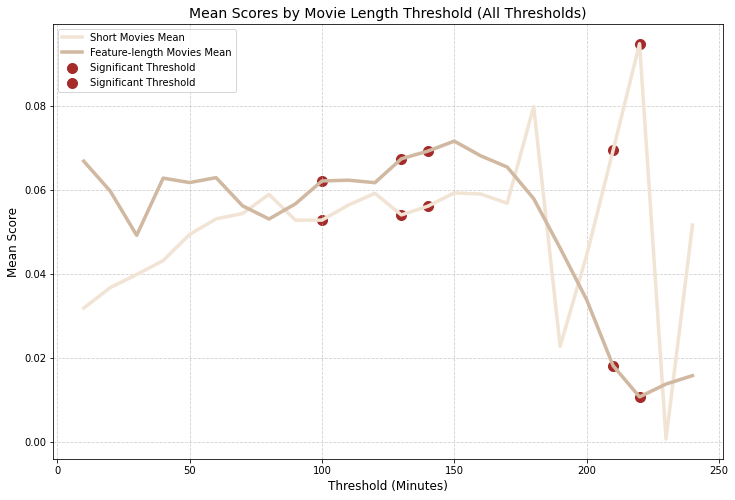


--- Analyzing with 3 categories: ---
Threshold: (20, 80), p-value: 0.0488 - Significant
Threshold: (35, 110), p-value: 0.0042 - Significant
Threshold: (45, 130), p-value: 0.0038 - Significant
Threshold: (50, 140), p-value: 0.0473 - Significant
Threshold: (90, 220), p-value: 0.0157 - Significant
Threshold: (100, 130), p-value: 0.0002 - Significant
Threshold: (110, 150), p-value: 0.0045 - Significant
Threshold: (170, 210), p-value: 0.0070 - Significant
Threshold: (190, 210), p-value: 0.0403 - Significant
Threshold: (150, 200), p-value: 0.0236 - Significant


In [ ]:
%run src/scripts/rq_7.py
img = Image.open('assets/img/distribution_lenght.png')

## 8. Collection of movies

### Do sequels or franchise movies follow different patterns in their endings compared to standalone films? 

Investigating whether franchise movies are more likely to have open-ended or happy endings to encourage future installments could reveal a unique trend in storytelling within cinematic universes.

Dataset loaded successfully from src/data/movies_dataset_final.tsv

----------------------------------------
Average Scores for Standalone vs. Collection Movies (before undersampling)
----------------------------------------
Standalone Movies (0)    : 0.05710735360171146
Collection Movies (1)    : 0.05245809989322952
----------------------------------------

Quantiles for Standalone and Collection Movies (before undersampling)
Quantile   Standalone (0)       Collection (1)
----------------------------------------
25th Percentile: -0.05                -0.05
50th Percentile: 0.05                 0.04
75th Percentile: 0.17                 0.16


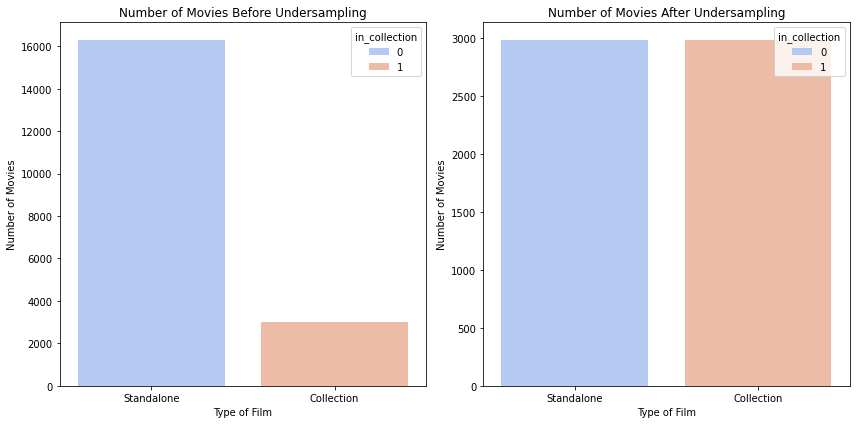


Kolmogorov-Smirnov Test for Normality:
Collection Films: p-value = 0.0000
Standalone Films: p-value = 0.0000

Normality assumption violated. Using Mann-Whitney U test...
Mann-Whitney U Test: p-value = 0.8881

There is no statistically significant difference between collection and standalone films' scores.

Average Scores for Standalone vs Collection Movies (After Undersampling):
Standalone Films: 0.05082445122898324
Collection Films: 0.05245809989322952


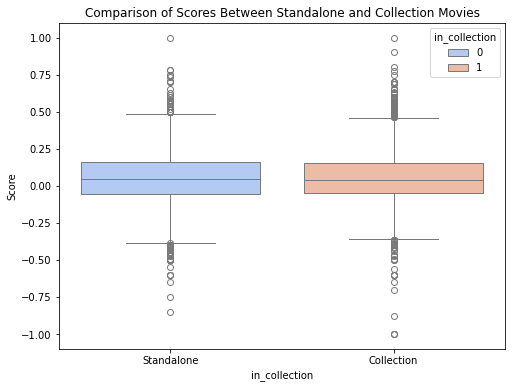

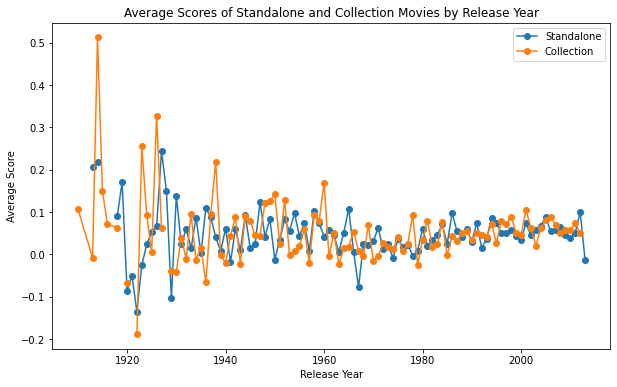

In [ ]:
%run src/scripts/rq_8.py
